In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sin, cos, sqrt, atan2, radians
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
import ast 

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df.host_since.isna().sum()

35


host is superhost
host total listings count
host has profile pic
host identify verified
neighborhood
property type
room type
accomodates
instant bookable
reviews per month

In [4]:
df[df['beds'] == 21]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
24273,23124338,https://www.airbnb.com/rooms/23124338,20200815122933,2020-08-15,New York Guests House,"Beautiful peaceful, quiet, clean 11 private r...",NaN,https://a0.muscache.com/pictures/4f2ce6cf-d827...,171830071,https://www.airbnb.com/users/show/171830071,Fatima,2018-02-05,US,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/ff8d1...,https://a0.muscache.com/im/pictures/user/ff8d1...,Tremont,1.0,1.0,"['email', 'phone']",t,f,NaN,Fordham,Bronx,40.85662,-73.89797,Private room in guesthouse,Private room,16,2.0,NaN,11.0,21.0,"[""Stove"", ""Hot water"", ""Refrigerator"", ""Hanger...",$66.14,2,31,2.0,2.0,31.0,31.0,2.0,31.0,NaN,t,0,0,0,0,2020-08-15,5,0,0,2018-02-19,2018-03-26,75.0,8.0,9.0,9.0,8.0,8.0,8.0,NaN,t,1,0,1,0,0.17


In [5]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200815122933,2020-08-16,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,61%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Coffee maker"", ""Refrigerator"", ""Heating"", ""I...",$175.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,365,2020-08-16,48,2,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.37
1,3831,https://www.airbnb.com/rooms/3831,20200815122933,2020-08-16,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,90%,96%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Coffee maker"", ""Refrigerator"", ""Heating"", ""I...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,13,21,40,265,2020-08-16,340,64,6,2014-09-30,2020-08-01,89.0,8.0,9.0,9.0,9.0,9.0,9.0,NaN,f,1,1,0,0,4.75
2,5121,https://www.airbnb.com/rooms/5121,20200815122933,2020-08-17,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,67%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Heati...",$60.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,t,30,60,90,365,2020-08-17,50,1,0,20

In [6]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.652700e+04,4.652700e+04,4.652700e+04,46492.000000,46492.000000,46527.000000,46527.000000,46527.000000,9317.000000,42070.000000,46010.000000,46527.000000,4.652700e+04,46520.000000,46520.000000,4.652000e+04,4.652000e+04,46520.000000,4.652000e+04,0.0,46527.000000,46527.000000,46527.000000,46527.000000,46527.000000,46527.000000,46527.000000,34718.000000,34684.000000,34698.000000,34671.000000,34690.000000,34667.000000,34668.000000,0.0,46527.000000,46527.000000,46527.000000,46527.000000,35816.000000
mean,2.299891e+07,2.020082e+13,8.439186e+07,15.588015,15.588015,40.729563,-73.950918,2.784448,1.110926,1.295864,1.518279,8.519634,4.761209e+04,8.588521,12.565198,4.170403e+05,9.248330e+05,12.236831,9.236629e+05,NaN,10.452275,22.806822,35.822985,121.142842,22.767167,5.253401,0.185527,93.879745,9.606043,9.275001,9.730322,9.731104,9.597312,9.387043,NaN,5.890451,3.558729,2.134460,0.087541,0.905802
std,1.373123e+07,9.015722e+00,9.913260e+07,119.746050,119.746050,0.054974,0.047562,1.829896,0.336298,0.687676,1.112068,23.050570,9.956684e+06,27.556515,57.826708,2.986743e+07,4.451823e+07,56.234547,4.446197e+07,NaN,12.758523,25.999954,39.476850,142.517750,46.603900,11.002861,1.012862,9.287887,0.897654,1.125084,0.788556,0.814158,0.787978,0.978652,NaN,22.731346,20.402797,10.204224,0.896823,1.280898
min,2.595000e+03,2.020082e+13,2.438000e+03,0.000000,0.000000,40.508680,-74.239860,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.062558e+07,2.020082e+13,9.194284e+06,1.000000,1.000000,40.689945,-73.983170,2.000000,1.000000,1.000000,1.000000,2.000000,2.900000e+01,1.000000,2.000000,3.000000e+01,3.000000e+01,2.000000,3.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.220528e+07,2.020082e+13,3.719496e+07,1.000000,1.000000,40.724400,-73.955380,2.000000,1.000000,1.000000,1.000000,3.000000,3.650000e+02,3.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,1.000000,8.000000,46.000000,4.000000,0.000000,0.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.380000
75%,3.575440e+07,2.020082e+13,1.362274e+08,2.000000,2.000000,40.763040,-73.934170,4.000000,1.000000,1.000000,2.000000,6.000000,1.125000e+03,6.000000,7.000000,1.125000e+03,1.125000e+03,6.000000,1.125000e+03,NaN,27.000000,55.000000,84.000000,252.000000,21.000000,5.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,1.210000
max,4.481801e+07,2.020082e+13,3.624537e+08,2567.000000,2567.000000,40.911690,-73.712990,22.000000,7.500000,21.000000,40.000000,1250.000000,2.147484e+09,1250.000000,1250.000000,2.147484e+09,2.147484e+09,1250.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,746.000000,484.000000,104.000000,100.000000,10.000000,10.000000,10.0

In [7]:
df.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000e+00,-3.998136e-15,5.858238e-01,8.721826e-02,8.721826e-02,4.233255e-03,1.016921e-01,4.044721e-02,4.799494e-02,4.267537e-02,3.727225e-02,2.932212e-02,-5.718262e-03,2.918253e-02,6.355643e-02,1.047200e-02,1.415149e-02,6.340960e-02,1.415294e-02,NaN,1.721091e-01,1.929628e-01,1.994001e-01,1.086195e-01,-2.917576e-01,3.376758e-02,8.577024e-02,-2.650543e-02,-6.134772e-02,8.035049e-03,-7.837016e-02,-9.528213e-02,2.823166e-02,-2.250613e-02,NaN,1.161917e-01,5.967970e-02,1.299240e-01,4.651821e-02,1.251345e-01
scrape_id,-3.998136e-15,1.000000e+00,-3.027870e-13,3.834609e-15,3.834609e-15,-2.919988e-12,-8.723915e-12,-2.194413e-14,5.982161e-16,3.073388e-14,-1.536166e-15,-2.486854e-14,1.131221e-15,-1.837466e-14,1.659495e-14,5.943813e-16,5.086879e-15,-1.393524e-14,1.368358e-15,NaN,-5.653119e-14,4.167051e-14,1.070810e-13,-1.212638e-14,1.623473e-13,1.312403e-14,-3.433845e-14,-1.014398e-14,1.374754e-14,2.715811e-15,-3.388629e-16,-3.295235e-14,-1.195026e-14,1.448952e-15,NaN,8.485125e-15,-1.601300e-14,-3.109883e-14,6.763031e-15,2.875585e-14
host_id,5.858238e-01,-3.027870e-13,1.000000e+00,4.835355e-03,4.835355e-03,3.317718e-02,1.439994e-01,4.721887e-02,1.328056e-02,3.593663e-02,6.563323e-02,-1.240240e-03,-3.124803e-03,-1.076678e-03,1.608572e-02,2.200490e-02,3.196609e-02,1.519079e-02,3.196685e-02,NaN,1.949641e-01,2.161508e-01,2.228817e-01,1.829301e-01,-1.193349e-01,1.066631e-01,9.924021e-02,-1.112155e-01,-1.288211e-01,-3.634772e-02,-1.170508e-01,-1.425861e-01,-4.650878e-02,-9.807932e-02,NaN,6.221040e-02,1.603538e-03,1.182927e-01,4.472104e-02,1.839064e-01
host_listings_count,8.721826e-02,3.834609e-15,4.835355e-03,1.000000e+00,1.000000e+00,3.185482e-02,-7.776609e-02,-1.667052e-02,6.478555e-03,-1.382231e-02,-2.959022e-02,9.788085e-02,-5.704575e-04,1.932862e-01,6.711446e-01,-1.052138e-03,-1.351112e-03,6.707994e-01,-1.351338e-03,NaN,-7.452828e-03,1.353732e-02,2.492537e-02,9.138475e-02,-5.207964e-02,-4.904279e-02,-1.748476e-02,-2.239018e-02,-2.616969e-02,-8.606139e-04,-2.611293e-02,-4.503839e-02,6.083979e-03,-5.597640e-02,NaN,7.197349e-01,7.777729e-01,4.698733e-02,-1.621473e-05,-3.398386e-02
host_total_listings_count,8.721826e-02,3.834609e-15,4.835355e-03,1.000000e+00,1.000000e+00,3.185482e-02,-7.776609e-02,-1.667052e-02,6.478555e-03,-1.382231e-02,-2.959022e-02,9.788085e-02,-5.704575e-04,1.932862e-01,6.711446e-01,-1.052138e-03,-1.351112e-03,6.707994e-01,-1.351338e-03,NaN,-7.452828e-03,1.353732e-02,2.492537e-02,9.138475e-02,-5.207964e-02,-4.904279e-02,-1.748476e-02,-2.239018e-02,-2.616969e-02,-8.606139e-04,-2.611293e-02,-4.503839e-02,6.083979e-03,-5.597640e-02,NaN,7.197349e-01,7.777729e-01,4.698733e-02,-1.621473e-05,-3.398386e-02
latitude,4.233255e-03,-2.919988e-12,3.317718e-02,3.185482e-02,3.185482e-02,1.000000e+00,7.922634e-02,-4.606169e-02,-6.856404e-02,-7.572898e-02,-5.218296e-02,2.728678e-02,5.131701e-03,2.499238e-02,2.768057e-02,7.335969e-03,1.182784e-02,2.739968e-02,1.182688e-02,NaN,4.188191e-02,3.072951e-02,2.452669e-02,2.052180e-02,-2.619312e-02,-3.443041e-02,-3.919631e-02,-2.532105e-02,-3.293367e-02,-2.310307e-02,-2.620529e-02,-2.240141e-02,2.996696e-02,-3.103295e-02,NaN,5.344469e-02,4.443127e-02,2.714780e-02,-2.653473e-03,-3.389619e-02
longitude,1.016921e-01,-8.72

In [8]:
df


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200815122933,2020-08-16,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,61%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Coffee maker"", ""Refrigerator"", ""Heating"", ""I...",$175.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,365,2020-08-16,48,2,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.37
1,3831,https://www.airbnb.com/rooms/3831,20200815122933,2020-08-16,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,90%,96%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Coffee maker"", ""Refrigerator"", ""Heating"", ""I...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,13,21,40,265,2020-08-16,340,64,6,2014-09-30,2020-08-01,89.0,8.0,9.0,9.0,9.0,9.0,9.0,NaN,f,1,1,0,0,4.75
2,5121,https://www.airbnb.com/rooms/5121,20200815122933,2020-08-17,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,67%,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Wifi"", ""Air conditioning"", ""Heati...",$60.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,t,30,60,90,365,2020-08-17,50,1,0,20

In [9]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               18
description                                      1331
neighborhood_overview                           16801
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                          35
host_since                                         35
host_location                                     164
host_about                                      18452
host_response_time                              24901
host_response_rate                              24901
host_acceptance_rate                            16286
host_is_superhost                                  35
host_thumbnail_url          

In [10]:
# def find_landmark_cord(a, b):
    # if a == 

In [11]:
## variable assigns
reviews_per_month_mean = df.reviews_per_month.mean()


In [12]:
##### DATA CLEANING
df['description_count'] = df['description'].apply(lambda x: 0 if type(x) == float else len(x.split()))
df.drop(columns=['description'], inplace=True, axis=1)
df['host_since'] = np.where(df['host_since'].isna(), 2020, df['host_since'])
df['host_since_year'] = df['host_since'].apply(lambda x: 2020 - float(x.split('-')[0]) if type(x)==str else 2020-x)
df['host_is_superhost'] = np.where(df['host_is_superhost'] == 't', 1, 0)
df['host_has_profile_pic'] = np.where(df['host_has_profile_pic'] == 't', 1, 0)
df['host_identity_verified'] = np.where(df['host_identity_verified'] == 't', 1, 0)
df['price'] = np.where(df['price'], df['price'].str.replace('$', '').str.replace(',', '').astype(float), df['price'])
df = df.astype({'price': 'float'}) ## convert to float
df['log_price'] = np.where(df['price'], np.log(df['price']), df['price'])
df['has_availability'] = np.where(df['has_availability'].eq('t'), 1, 0)
df['bedrooms'] = np.where(df['bedrooms'].isna(), 1, df['bedrooms'])
df['beds'] = np.where(df['beds'].isna(), 1, df['beds'])
df['overall_rating'] = np.where(df['review_scores_rating'], df['review_scores_rating']/100, df['review_scores_rating'].mean()/100)
df['instant_bookable'] = np.where(df['instant_bookable'] =='t', 1, 0)



df['reviews_per_month'] = np.where(df['reviews_per_month'], np.log(df['reviews_per_month']), df['reviews_per_month'].mean())
cond_rooms = [
    df['room_type'].eq('Entire home/apt'),
    df['room_type'].eq('Private room'),
    df['room_type'].eq('Shared room'),
    df['room_type'].eq('Hotel room'),    
]
choices_rooms = [
    'entire_home',
    'private_room',
    'shared_room',
    'hotel_room'
]
df['room_type'] = np.select(cond_rooms, choices_rooms, df['room_type'])

df['host_verifications'] = df['host_verifications'].apply(lambda x: ast.literal_eval(x) if type(x)==str else x)
df.dropna(subset=['host_verifications'], inplace=True, axis=0)
df['amenities'] = df['amenities'].apply(lambda x: ast.literal_eval(x) if type(x)==str else x)
df.dropna(subset=['amenities'], inplace=True, axis=0)
df.price = np.where(df['price'] == 0, np.nan, df['price'])
df.dropna(subset=['price'], axis=0, inplace=True)

## helper functions
def calculate_dist(lat_from, long_from, search):
    landmarks = {'Manhattan': (40.7812, -73.9665), 'Brooklyn': (40.6962, -73.9975), 'Queens': (40.7557, -73.8831), 
             'Bronx': (40.8296, -73.9262), 'Staten Island': (40.7115, -74.0137)}
    if landmarks[search]:
        lat_to = landmarks[search][0]
        long_to = landmarks[search][1]
    R = 6373.0
    lat1 = radians(lat_from)
    lon1 = radians(long_from)
    lat2 = radians(lat_to)
    lon2 = radians(long_to)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

df['dist_diff'] = df.apply(lambda x: calculate_dist(x.latitude, x.longitude, x.neighbourhood_group_cleansed), axis=1)
df['dist_diff']


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         3.395218
1         3.412416
2         3.653552
3         3.902804
4         2.387730
           ...    
46522     5.413953
46523     9.177431
46524     7.195035
46525     0.750840
46526    10.839782
Name: dist_diff, Length: 46470, dtype: float64

In [13]:
## splitting list into cols

mlb = MultiLabelBinarizer()
host_df = pd.DataFrame(mlb.fit_transform(df['host_verifications']),columns=mlb.classes_, index=df.index)
df = pd.concat([df, host_df], axis=1)


In [14]:
new_mlb = MultiLabelBinarizer()
amen_df = pd.DataFrame(new_mlb.fit_transform(df['amenities']),columns=new_mlb.classes_, index=df.index)
df = pd.concat([df, amen_df], axis=1)

In [15]:
## dummy vars
df = pd.concat([df, pd.get_dummies(df['room_type'], drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group_cleansed'], drop_first=True)], axis=1)

In [16]:
## dropping after dummy variables


In [17]:
df.drop(columns=[
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'neighborhood_overview', 
    'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 
    'host_thumbnail_url', 'host_picture_url','host_neighbourhood', 'neighbourhood', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
    'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
    'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped', 'license', 'host_listings_count', 'host_total_listings_count', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'bathrooms', 'bathrooms_text', 'minimum_nights', 'maximum_nights', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_location', 'review_scores_value', 'reviews_per_month', 'overall_rating', 'review_scores_communication', 'host_since', 'room_type', 'availability_90'
], axis=1, inplace=True)


In [18]:
##################################  EDA  #################################

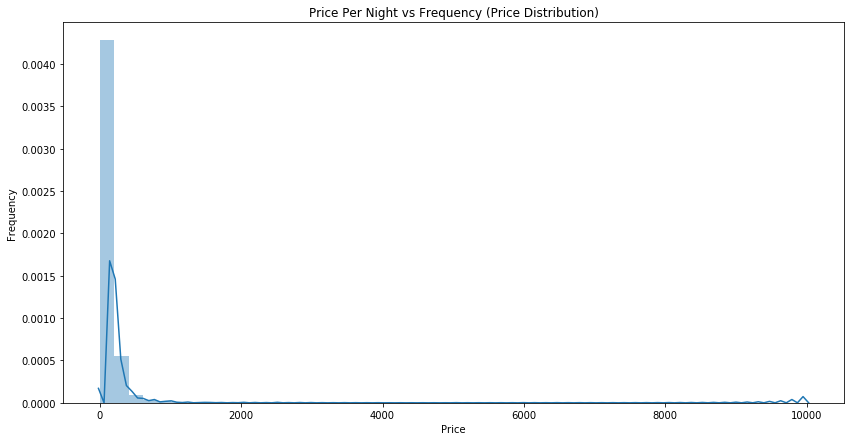

In [19]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price Per Night vs Frequency (Price Distribution)');


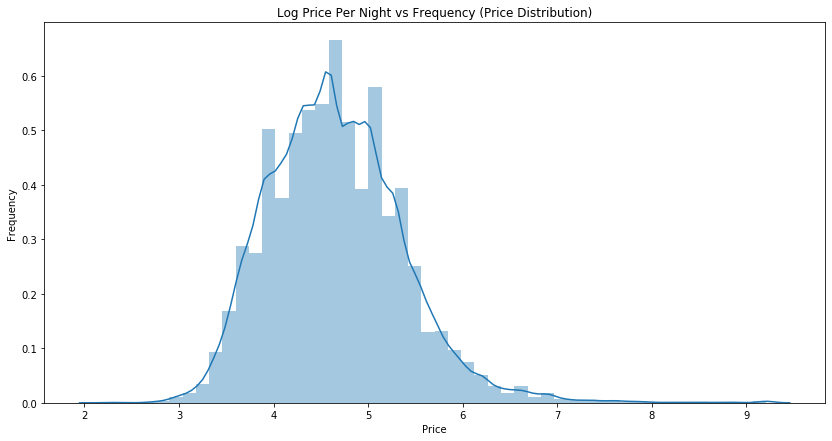

In [20]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Log Price Per Night vs Frequency (Price Distribution)');


In [21]:
### features
## overall_rating, review_scores_rating
features_col = [
    'has_availability', 'availability_30', 'availability_60', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'beds', 'bedrooms', 'accommodates', 'number_of_reviews', 'host_has_profile_pic', 'hotel_room', 'private_room', 'shared_room', 'host_since_year', 'dist_diff'
]

str_features_col = '+'.join(features_col)
str_features_col

'has_availability+availability_30+availability_60+calculated_host_listings_count+calculated_host_listings_count_entire_homes+beds+bedrooms+accommodates+number_of_reviews+host_has_profile_pic+hotel_room+private_room+shared_room+host_since_year+dist_diff'

In [22]:
df

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,"[email, phone, reviews, offline_government_id,...",1,1,Manhattan,40.75362,-73.98377,2,1.0,1.0,"[Coffee maker, Refrigerator, Heating, Iron, Ki...",175.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,"[email, phone, reviews, offline_government_id,...",1,1,Brooklyn,40.68514,-73.95976,3,1.0,3.0,"[Coffee maker, Refrigerator, Heating, Iron, Ki...",75.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,"[email, phone, facebook, reviews, offline_gove...",1,1,Brooklyn,40.68688,-73.95596,2,1.0,1.0,"[Kitchen, Wifi, Air conditioning, Heating]",60.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,"[email, phone, reviews]",1,0,Brooklyn,40.66120,-73.99423,4,2.0,2.0,"[Carbon monoxide alarm, Dryer, Cable TV, TV, A...",175.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,"[email, phone, facebook, reviews]",1,0,Manhattan,40.76489,-73.98493,2,1.0,1.0,"[Hangers, Essentials, Bed linens, TV, Hair dry...",65.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0

In [23]:
df.has_availability.isna().sum()

0

In [24]:
datetime.now().year

2020

In [25]:
len(df.columns)

138

In [26]:
mlr_model = smf.ols(formula=f'log_price~{str_features_col}', data=df).fit()
mlr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     2756.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:03:35   Log-Likelihood:                -35405.
No. Observations:               46470   AIC:                         7.084e+04
Df Residuals:                   46454   BIC:                         7.098e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       4.9327      0.115     42.894      0.000       4.707       5.158
has_availability                               -0.3283      0.107     -3.078      0.002      -0.537      -0.119
availability_30                                 0.0151      0.001     20.375      0.000       0.014       0.017
availability_60                                -0.0043      0.000    -11.848      0.000      -0.005      -0.004
calculated_host_listings_count                 -0.0064      0.000    -26.521      0.000      -0.007      -0.006
calculated_host_listings_count_entire_homes     0.0082      0.000     30.313      0.000       0.008       0.009
beds                                           -0.0283      0.004     -8.078      0.000      -0.035      -0.021
bedrooms                                        0.1408      0.006     24.798      0.000       0.130       0.152
accommodates                                    0.1017      0.002     45.453      0.000       0.097       0.106
number_of_reviews                              -0.0011   5.34e-05    -20.958      0.000      -0.001      -0.001
host_has_profile_pic                           -0.0940      0.042     -2.214      0.027      -0.177      -0.011
hotel_room                                      0.5457      0.028     19.573      0.000       0.491       0.600
private_room                                   -0.5612      0.006    -96.742      0.000      -0.573      -0.550
shared_room                                    -0.8285      0.017    -47.786      0.000      -0.863      -0.795
host_since_year                                 0.0155      0.001     15.393      0.000       0.014       0.017
dist_diff                                      -0.0210      0.001    -23.598      0.000      -0.023      -0.019
==============================================================================
Omnibus:                    16051.069   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126993.115
Skew:                           1.447   Prob(JB):                         0.00
Kurtosis:                      10.564   Cond. No.                     3.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# sns.heatmap(df.corr(), annot=True)

In [28]:
ind_feature_df = df[features_col]

In [29]:
all_features_df = df.drop(columns=['log_price', 'price', 'host_verifications', 'amenities', 'neighbourhood_group_cleansed'], axis=1)

In [30]:
all_features_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,1,40.75362,-73.98377,2,1.0,1.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,40.68514,-73.95976,3,1.0,3.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,40.68688,-73.95596,2,1.0,1.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,40.66120,-73.99423,4,2.0,2.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,40.76489,-73.98493,2,1.0,1.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,40.73433,-7

In [31]:
df

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,"[email, phone, reviews, offline_government_id,...",1,1,Manhattan,40.75362,-73.98377,2,1.0,1.0,"[Coffee maker, Refrigerator, Heating, Iron, Ki...",175.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,"[email, phone, reviews, offline_government_id,...",1,1,Brooklyn,40.68514,-73.95976,3,1.0,3.0,"[Coffee maker, Refrigerator, Heating, Iron, Ki...",75.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,"[email, phone, facebook, reviews, offline_gove...",1,1,Brooklyn,40.68688,-73.95596,2,1.0,1.0,"[Kitchen, Wifi, Air conditioning, Heating]",60.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,"[email, phone, reviews]",1,0,Brooklyn,40.66120,-73.99423,4,2.0,2.0,"[Carbon monoxide alarm, Dryer, Cable TV, TV, A...",175.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,"[email, phone, facebook, reviews]",1,0,Manhattan,40.76489,-73.98493,2,1.0,1.0,"[Hangers, Essentials, Bed linens, TV, Hair dry...",65.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0

In [32]:
## dropping converted columns
df.drop(columns=['host_verifications', 'amenities', 'host_verifications','latitude', 'longitude'], axis=1, inplace=True)

In [33]:
### modeling normal linear regression



# norm linear regression model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_features_df, df['log_price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

from sklearn.preprocessing import StandardScaler


#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=5)
selector.fit(X_train, y_train)
selected_col = X_train.columns[selector.get_support()]
 #removed_col = X_poly_train.columns[~selector.get_support()]
# print(selected_col)
X_train = X_train[selected_col]
X_test = X_test[selected_col]
#print(X_train)


#scaler_normal = StandardScaler()
#print(X_train.shape, y_train.shape)

# fit the scaler to the training data
#scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values

#transform the training data
#X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=all_features_df.columns)


#transform the testing data
#X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=all_features_df.columns)
print(X_train.shape, X_test.shape)

from sklearn.linear_model import LinearRegression
lm_norm = LinearRegression()

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)
# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))

Training set - Features:  (37176, 133) Target:  (37176,)
Training set - Features:  (9294, 133) Target:  (9294,)
(37176, 5) (9294, 5)
Training Root Mean Squared Error: 313.114583482377
Test Root Mean Squared Error: 293.9240769036133
R-SQUARED: (train) 0.4033337209024249 (test) 0.4038897022183294


In [34]:
X_train

,accommodates,bedrooms,beds,Lock on bedroom door,private_room
41836,2,1.0,1.0,0,0
30513,4,1.0,1.0,0,0
9940,2,1.0,1.0,0,0
44212,2,1.0,1.0,1,1
23524,2,1.0,1.0,0,0
...,...,...,...,...,...
11299,2,1.0,1.0,1,1
44789,2,1.0,1.0,1,1
38193,4,2.0,2.0,0,0
861,1,1.0,1.0,1,1


In [35]:
# sns.distplot(df['accommodates'])

In [36]:
ind_feature_df.shape

(46470, 15)

In [37]:
# df.dropna(subset=['overall_rating', 'review_scores_rating', 'review_scores_cleanliness'], axis =0, inplace=True)

In [38]:
df.price.isna().sum()

0

In [39]:
####EDA

#fig, ax = plt.subplots(figsize=(40, 20))
#mask = np.zeros_like(df.corr()) #heat map of correlations
#mask[np.triu_indices_from(mask)] = True
#sns.axes_style("white"):    ax = sns.heatmap(df.corr(), mask=mask, square=True)

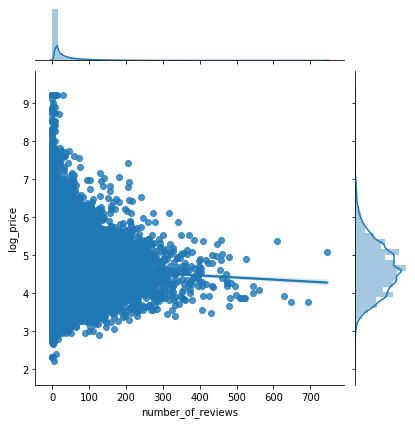

In [40]:
sns.jointplot(x="number_of_reviews", y="log_price", data=df, kind='reg');


In [41]:
df['price'].isna().sum()

0

In [42]:
df.number_of_reviews.isna().sum()

0

In [43]:
# for column in all_features_df:
    # sns.jointplot(x=column, y='log_price', data=df, kind='scatter');

In [44]:
### Need to change list into each individual columns


In [45]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [46]:
all_features_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,1,40.75362,-73.98377,2,1.0,1.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,40.68514,-73.95976,3,1.0,3.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,40.68688,-73.95596,2,1.0,1.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,40.66120,-73.99423,4,2.0,2.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,40.76489,-73.98493,2,1.0,1.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,40.73433,-7

In [47]:
df.number_of_reviews_ltm.value_counts()

0      24062
1       4158
2       2530
3       1797
4       1419
5       1087
6        864
7        761
8        654
9        635
10       597
11       547
12       493
13       459
14       445
16       411
15       402
17       376
18       360
19       339
20       296
21       281
22       272
24       247
23       228
26       225
25       197
28       164
29       160
27       159
30       150
31       137
33       132
32       113
34        99
35        98
36        91
37        74
38        69
41        52
39        50
43        49
40        48
42        47
45        45
44        43
46        36
52        29
47        29
54        26
50        25
56        25
51        24
49        23
53        20
48        20
59        19
64        16
57        15
58        14
55        14
63        14
61        13
65         9
74         8
66         8
68         8
76         7
70         7
71         7
62         7
60         6
93         6
69         6
67         6
83         6
72         6

In [48]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [49]:
len(df.columns)

134

Notes
Columns to clean:
name, description, neighborhood_overview, host_name(female vs male), host_since(date), host_about(len), host_response_time, host_response_rate, host_acceptance_rate, 

Columns to drop:
id, listing_url, scrape_id, last_scraped, picture_url, host_id, host_url,  host_name, host_location, 

Notes
Columns to clean:

Columns to drop:
id, listing_url, scrape_id, picture_url, host_id, host_url,  host_name, neighbourhood, neighbourhood_cleansed

In [50]:
## lassoCV
### modeling normal linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_features_df, df['log_price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

from sklearn.preprocessing import StandardScaler


#### selecting helpful columns



#scaler_normal = StandardScaler()
#print(X_train.shape, y_train.shape)

# fit the scaler to the training data
#scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values

#transform the training data
#X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=all_features_df.columns)


#transform the testing data
#X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=all_features_df.columns)
# print(X_train.shape, X_test.shape)

from sklearn.linear_model import LassoCV
lm_norm = LassoCV(cv=5,random_state=40)

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)

# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))

Training set - Features:  (37176, 133) Target:  (37176,)
Training set - Features:  (9294, 133) Target:  (9294,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.37678201045037, tolerance: 1.5144983576719009
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.042969115212145, tolerance: 1.5144983576719009
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9037876776892517, tolerance: 1.5144983576719009
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

Training Root Mean Squared Error: 308.2055507245226
Test Root Mean Squared Error: 289.9948735507625
R-SQUARED: (train) 0.5370442575974861 (test) 0.5352881985417781


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.095033286654143, tolerance: 1.882788089966522
  positive)


In [51]:
df.shape

(46470, 134)

In [52]:
np.sqrt(metrics.mean_squared_error((y_test), (y_test_pred)))


0.4885176034188876

In [53]:
df.columns = df.columns.str.replace(' ', "").str.replace('"', '')

In [54]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Babybath,Babymonitor,Babysitterrecommendations,Bakingsheet,Barbecueutensils,Bathtub,Beachessentials,Beachfront,Bedlinens,Breadmaker,Breakfast,Buildingstaff,CableTV,Carbonmonoxidealarm,Changingtable,Children’sbooksandtoys,Children’sdinnerware,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,EVcharger,Elevator,Essentials,Ethernetconnection,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gameconsole,Gardenorbackyard,Gym,Hairdryer,Hangers,Heating,Highchair,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Laptop-friendlyworkspace,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Outletcovers,Oven,Pack’nPlay/travelcrib,Paidparkingoffpremises,Paidparkingonpremises,Patioorbalcony,Piano,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Room-darkeningshades,Shampoo,Showergel,Singlelevelhome,Ski-in/Ski-out,Smartlock,Smokealarm,Stairgates,Stove,TV,Tablecornerguards,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,365,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,265,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,365,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,295,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,340,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,Manhattan,2,1.0,1.0,145.0,1,14,44,164,0,0,0

In [55]:
# availability_365, manual_offline, manual_online, 
# sesame, sesame_offline,Babybath, Babymonitor,Babysitterrecommendations,
# Babysitterrecommendations, Bakingsheet, Barbecueutensils, Breadmaker
df.drop(columns=[
    'availability_365', 'manual_offline', 'manual_online', 'sesame', 
    'sesame_offline', 'Babybath', 'Babymonitor', 'Babysitterrecommendations', 'Bakingsheet', 'Barbecueutensils', 'Room-darkeningshades',
    'Breadmaker', 'Children’sdinnerware','Children’sbooksandtoys', 'Ski-in/Ski-out', 'Pack’nPlay/travelcrib', 'Laptop-friendlyworkspace',
    'Outletcovers', 'Tablecornerguards', 'Smartlock', 'Gameconsole', 'Paidparkingoffpremises', 'Ethernetconnection', 
    'Piano', 'Carbonmonoxidealarm', 'EVcharger', 'Heating', 'Highchair'
], axis=1, inplace=True)





In [56]:
features_df = df.drop(columns=['neighbourhood_group_cleansed', 'log_price', 'price'])
str_features_col= "+".join(features_df)

In [57]:
str_features_col

'host_is_superhost+host_has_profile_pic+host_identity_verified+accommodates+bedrooms+beds+has_availability+availability_30+availability_60+number_of_reviews+number_of_reviews_ltm+number_of_reviews_l30d+instant_bookable+calculated_host_listings_count+calculated_host_listings_count_entire_homes+calculated_host_listings_count_private_rooms+calculated_host_listings_count_shared_rooms+description_count+host_since_year+dist_diff+email+facebook+google+government_id+identity_manual+jumio+kba+offline_government_id+phone+reviews+selfie+sent_id+weibo+work_email+zhima_selfie+Airconditioning+BBQgrill+Bathtub+Beachessentials+Beachfront+Bedlinens+Breakfast+Buildingstaff+CableTV+Changingtable+Cleaningbeforecheckout+Coffeemaker+Cookingbasics+Crib+Dishesandsilverware+Dishwasher+Dryer+Elevator+Essentials+Extrapillowsandblankets+Fireextinguisher+Fireplaceguards+Firstaidkit+Freeparkingonpremises+Freestreetparking+Gardenorbackyard+Gym+Hairdryer+Hangers+Hostgreetsyou+Hottub+Hotwater+Indoorfireplace+Iron+Keyp

In [58]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,Manhattan,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,Manhattan,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,Brooklyn,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,Manhattan,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [59]:
mlr_model = smf.ols(formula=f'log_price~{str_features_col}', data=df).fit()
mlr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     612.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:03:46   Log-Likelihood:                -30249.
No. Observations:               46470   AIC:                         6.071e+04
Df Residuals:                   46366   BIC:                         6.162e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        4.4135      0.114     38.645      0.000       4.190       4.637
host_is_superhost                                0.0525      0.006      8.347      0.000       0.040       0.065
host_has_profile_pic                            -0.0240      0.038     -0.628      0.530      -0.099       0.051
host_identity_verified                           0.0358      0.008      4.756      0.000       0.021       0.051
accommodates                                     0.0954      0.002     46.880      0.000       0.091       0.099
bedrooms                                         0.1478      0.005     28.689      0.000       0.138       0.158
beds                                            -0.0223      0.003     -7.037      0.000      -0.029      -0.016
has_availability                                 0.0258      0.097      0.266      0.790      -0.164       0.216
availability_30                                  0.0113      0.001     16.936      0.000       0.010       0.013
availability_60                                 -0.0025      0.000     -7.508      0.000      -0.003      -0.002
number_of_reviews                               -0.0003   6.91e-05     -3.760      0.000      -0.000      -0.000
number_of_reviews_ltm                           -0.0017      0.000     -5.214      0.000      -0.002      -0.001
number_of_reviews_l30d                          -0.0273      0.003     -9.304      0.000      -0.033      -0.022
instant_bookable                                 0.0003      0.005      0.055      0.956      -0.009       0.010
calculated_host_listings_count                  -0.0391      0.002    -15.815      0.000      -0.044      -0.034
calculated_host_listings_count_entire_homes      0.0383      0.002     15.469      0.000       0.033       0.043
calculated_host_listings_count_private_rooms     0.0350      0.002     14.109      0.000       0.030       0.040
calculated_host_listings_count_shared_rooms      0.0014      0.004      0.337      0.736      -0.007       0.009
description_count                            -9.563e-05   4.58e-05     -2.086      0.037      -0.000   -5.77e-06
host_since_year                                  0.0139      0.001     10.803      0.000       0.011       0.016
dist_diff                                       -0.0103      0.001    -11.931      0.000      -0.012      -0.009
email                                           -0.0166      0.009     -1.788      0.074      -0.035       0.002
facebook                                        -0.0048      0.006     -0.858      0.391      -0.016       0.006
google                                          -0.0077      0.010     -0.739      0.460      -0.028       0.013
government_id                   

In [60]:
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,Airconditioning,BBQgrill,Bathtub,Beachessentials,Beachfront,Bedlinens,Breakfast,Buildingstaff,CableTV,Changingtable,Cleaningbeforecheckout,Coffeemaker,Cookingbasics,Crib,Dishesandsilverware,Dishwasher,Dryer,Elevator,Essentials,Extrapillowsandblankets,Fireextinguisher,Fireplaceguards,Firstaidkit,Freeparkingonpremises,Freestreetparking,Gardenorbackyard,Gym,Hairdryer,Hangers,Hostgreetsyou,Hottub,Hotwater,Indoorfireplace,Iron,Keypad,Kitchen,Lakeaccess,Lockonbedroomdoor,Lockbox,Longtermstaysallowed,Luggagedropoffallowed,Microwave,Oven,Paidparkingonpremises,Patioorbalcony,Pocketwifi,Pool,Privateentrance,Privatelivingroom,Refrigerator,Shampoo,Showergel,Singlelevelhome,Smokealarm,Stairgates,Stove,TV,Washer,Waterfront,Wifi,Windowguards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,StatenIsland
0,0,1,1,Manhattan,2,1.0,1.0,175.0,1,30,60,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,Brooklyn,3,1.0,3.0,75.0,1,13,21,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,Brooklyn,2,1.0,1.0,60.0,1,30,60,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,Brooklyn,4,2.0,2.0,175.0,1,12,12,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,Manhattan,2,1.0,1.0,65.0,1,17,44,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,0,1,1,Manhattan,2,1.0,1.0,145.0,1,14,44,0,0,0,0,1,1,0,0,0,6.0,4.976734,5.413953,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
46523,1,1,1,Manhattan,2,1.0,1.0,87.0,1,25,55,0,0,0,1,2,2,0,0,0,1.0,4.465908,9.177431,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
46524,0,1,1,Brooklyn,4,4.0,4.0,59.0,1,30,60,0,0,0,0,1,0,1,0,14,0.0,4.077537,7.195035,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0
46525,0,1,0,Manhattan,2,1.0,1.0,80.0,1,18,48,0,0,0,1,1,1,0,0,0,8.0,4.382027,0.750840,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [61]:
df.to_csv('final_data.csv')